# Importing the required Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Metrics
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score, recall_score, roc_auc_score,roc_curve, auc, f1_score 

from sklearn.metrics import matthews_corrcoef


# Loading Dataset

In [2]:
df= pd.read_csv('Hepatitis.csv')
data = pd.DataFrame(df)

In [5]:
df.head(2)

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85,18,4.0,61,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135,42,3.5,61,1


In [6]:
df.shape

(142, 20)

# Check for any null values

In [10]:
df.isnull().any()

class             False
age               False
sex               False
steroid           False
antivirals        False
fatigue           False
malaise           False
anorexia          False
liver_big         False
liver_firm        False
spleen_palable    False
spiders           False
ascites           False
varices           False
bilirubin         False
alk_phosphate     False
sgot              False
albumin           False
protime           False
histology         False
dtype: bool

In [12]:
missing_values = ['NONE', 'None', 'none', 'NAN', 'Nan', 'nan', 'NA', 'Na', 'na']
df = pd.read_csv('./Hepatitis.csv', na_values = missing_values)
df.isnull().sum()

class             0
age               0
sex               0
steroid           0
antivirals        0
fatigue           0
malaise           0
anorexia          0
liver_big         0
liver_firm        0
spleen_palable    0
spiders           0
ascites           0
varices           0
bilirubin         0
alk_phosphate     0
sgot              0
albumin           0
protime           0
histology         0
dtype: int64

# Delete Class Column

In [13]:
df.drop(['class'], axis=1, inplace=True)
df.head(2)

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,30,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85,18,4.0,61,1
1,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135,42,3.5,61,1


In [14]:
df.shape

(142, 19)

In [15]:
df.describe()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,40.816901,1.105634,1.514085,1.838028,1.359155,1.619718,1.795775,1.823944,1.584507,1.809859,1.669014,1.880282,1.880282,1.382958,105.647887,83.507042,3.830493,61.704225,1.443662
std,12.189182,0.308456,0.501571,0.369729,0.481451,0.487174,0.404561,0.382216,0.494551,0.393801,0.472234,0.325781,0.325781,1.166526,47.375099,82.417700,0.618103,17.696732,0.498575
min,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.300000,26.000000,14.000000,2.100000,0.000000,1.000000
25%,32.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,0.700000,78.500000,32.250000,3.500000,56.250000,1.000000
50%,39.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,100.000000,58.000000,3.900000,61.000000,1.000000
75%,50.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.480000,119.750000,99.500000,4.200000,66.000000,2.000000
max,78.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,8.000000,295.000000,648.000000,6.400000,100.000000,2.000000


In [16]:
# Changing the values in Hepatitis "histology" column 
df['histology'] = df['histology'] - 1 

In [21]:
df.histology.value_counts()[:10]

0    79
1    63
Name: histology, dtype: int64

# Total Hepatitis Patients and Total No Hepatitis Patients

In [23]:
print('Values of Hepatitis male patient is {} '.format(df.histology.value_counts()[0]))

Values of Hepatitis male patient is 79 


In [41]:
print ('Total Hepatitis Patients :  {} and its percentage is {} %'.format(df.histology.value_counts()[0], 
      round(df.histology.value_counts()[0]/df.histology.value_counts().sum()*100,2)) )

Total Hepatitis Patients :  79 and its percentage is 55.63 %


In [34]:
print('Values of Hepatitis female patient is {} and percentage is {}'.format(df.histology.value_counts()[1], round(df.histology.value_counts()[1] / df.histology.value_counts().sum()*100, 2)))

Values of Hepatitis female patient is 63 and percentage is 44.37


# In Graph 0 represent Hepatitis Patients and 1 represent No Hepatitis Patients

0    79
1    63
Name: histology, dtype: int64

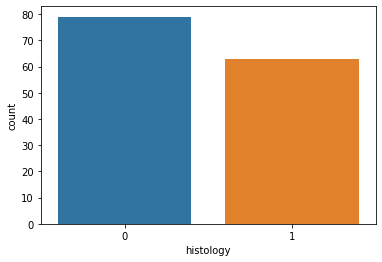

In [42]:
sns.countplot(data=df, x = 'histology', label='Count')
df['histology'].value_counts()

# Total number of Male -> 1 and Female -> 2 Patients

Number of Patients that are Male:  127
Number of Patients that are Female:  15


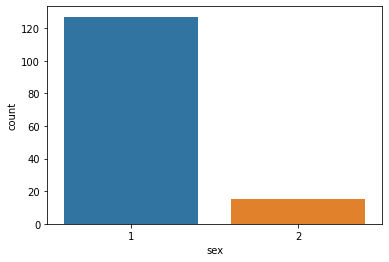

In [43]:
sns.countplot(data=df, x = 'sex', label='Count')
M, F = df['sex'].value_counts()
print('Number of Patients that are Male: ',M)
print('Number of Patients that are Female: ',F)

In [44]:
# Age seems to be a factor for Hepatitis disease for both male and female genders

df[['sex', 'histology','age']].groupby(['histology','sex'],
as_index=False).count().sort_values(by='histology', ascending=False)

,histology,sex,age
2,1,1,59
3,1,2,4
0,0,1,68
1,0,2,11


In [46]:
df.head(2)

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,30,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85,18,4.0,61,0
1,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135,42,3.5,61,0


In [48]:
df.keys()

Index(['age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia',
       'liver_big', 'liver_firm', 'spleen_palable', 'spiders', 'ascites',
       'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime',
       'histology'],
      dtype='object')

# Here X is our features and y is our target

In [49]:
X = df[['age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise',
       'anorexia', 'liver_big', 'liver_firm', 'spleen_palable', 'spiders',
       'ascites', 'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
       'protime']]
y = df['histology']

In [97]:
#from sklearn.preprocessing import StandardScaler
#ss = StandardScaler()
#X = ss.fit_transform(X)

# Before Modelling let us split the data into train and test data

In [67]:
#creat train-test split parts for manual split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print("Train Shape: {}".format(X_train.shape))
print("Test Shape: {}".format(X_test.shape))

Train Shape: (113, 18)
Test Shape: (29, 18)


In [68]:
# Importing modules

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

# K-NN


Accuracy: 
 0.8620689655172413

Confusion Matrix: 
 [[16  2]
 [ 2  9]]

Classification Report: 

               precision    recall  f1-score   support

           0       0.89      0.89      0.89        18
           1       0.82      0.82      0.82        11

    accuracy                           0.86        29
   macro avg       0.85      0.85      0.85        29
weighted avg       0.86      0.86      0.86        29



<AxesSubplot:>

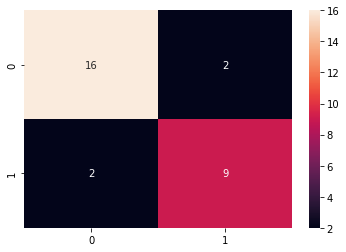

In [69]:
Knn = KNeighborsClassifier(n_neighbors= 5)
Knn.fit(X_train, y_train)
#Predict Output
K_predicted= Knn.predict(X_test)
Knn_score = round(Knn.score(X_train, y_train) * 100, 2)
Knn_score_test = round(Knn.score(X_test, y_test) * 100, 2)

print('\nAccuracy: \n', accuracy_score(y_test,K_predicted))
print('\nConfusion Matrix: \n', confusion_matrix(y_test,K_predicted))
print('\nClassification Report: \n\n', classification_report(y_test,K_predicted))

sns.heatmap(confusion_matrix(y_test,K_predicted),annot=True,fmt="d")

In [70]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test,K_predicted)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test,K_predicted)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test,K_predicted)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test,K_predicted)
print('F1 score: %f' % f1)
MCC = matthews_corrcoef(y_test,K_predicted)
print('MCC: %f' % f1)

Accuracy: 0.862069
Precision: 0.818182
Recall: 0.818182
F1 score: 0.818182
MCC: 0.818182


In [75]:

from sklearn.model_selection import cross_val_score
# search for an optimal value of K for KNN

# range of k we want to try
k_range = range(1, 5)
# empty list to store scores
k_scores = []

# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())


print(k_scores)

[0.5576190476190475, 0.5485714285714285, 0.6138095238095238, 0.5842857142857142, 0.6209523809523809]


ValueError: x and y must have same first dimension, but have shapes (2,) and (5,)

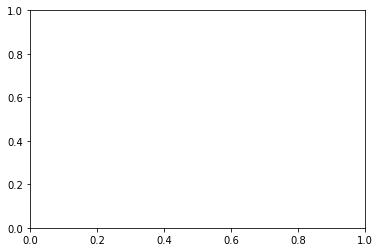

In [77]:
k_rangeplt.plot(, k_scores)
plt.title('CV for KNN')
plt.xlabel('Value of K for KNN')
plt.ylabel('CV Accuracy')
plt.grid()

In [153]:
print(scores)

[0.46666667 0.66666667 0.78571429 0.57142857 0.78571429 0.42857143
 0.71428571 0.64285714 0.57142857 0.71428571]


# Decision Tree


Accuracy: 
 0.5116279069767442

Confusion Matrix: 
 [[15  7]
 [14  7]]

Classification Report: 

               precision    recall  f1-score   support

           0       0.52      0.68      0.59        22
           1       0.50      0.33      0.40        21

    accuracy                           0.51        43
   macro avg       0.51      0.51      0.49        43
weighted avg       0.51      0.51      0.50        43



<AxesSubplot:>

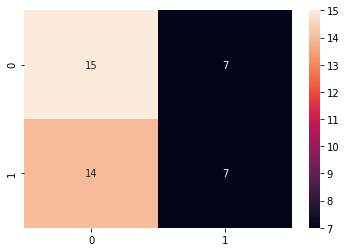

In [105]:
# Create Decision Tree Object
dtree = DecisionTreeClassifier()

# Train the model using the training sets and check score
dtree.fit(X_train, y_train)

#Predict Output
dt_predicted= dtree.predict(X_test)
dtree_score = round(dtree.score(X_train, y_train) * 100, 2)
dtree_score_test = round(dtree.score(X_test, y_test) * 100, 2)
#print('Decision Tree Training Score: \n', dtree_score)
#print('\nDecision Tree Test Score: \n', dtree_score_test)
print('\nAccuracy: \n', accuracy_score(y_test,dt_predicted))
print('\nConfusion Matrix: \n', confusion_matrix(y_test,dt_predicted))
print('\nClassification Report: \n\n', classification_report(y_test,dt_predicted))

sns.heatmap(confusion_matrix(y_test,dt_predicted),annot=True,fmt="d")

In [107]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test,dt_predicted)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test,dt_predicted)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test,dt_predicted)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test,dt_predicted)
print('F1 score: %f' % f1)
MCC = matthews_corrcoef(y_test,dt_predicted)
print('MCC: %f' % f1)

Accuracy: 0.511628
Precision: 0.500000
Recall: 0.333333
F1 score: 0.400000
MCC: 0.400000


# Logistic Regression

C:\Users\Sohail Ahmad\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Accuracy: 
 0.627906976744186

Confusion Matrix: 
 [[16  6]
 [10 11]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.62      0.73      0.67        22
           1       0.65      0.52      0.58        21

    accuracy                           0.63        43
   macro avg       0.63      0.63      0.62        43
weighted avg       0.63      0.63      0.62        43



<AxesSubplot:>

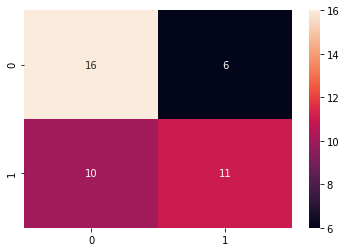

In [108]:
# Create logistic regression object
logreg = LogisticRegression()

# Train the model using the training sets and check score
logreg.fit(X_train, y_train)

#Predict Output
log_predicted= logreg.predict(X_test)
logreg_score = round(logreg.score(X_train, y_train) * 100, 2)
logreg_score_test = round(logreg.score(X_test, y_test) * 100, 2)

#print('\nLogistic Regression Training Score: \n', logreg_score)
#print('\nLogistic Regression Test Score: \n', logreg_score_test)
print('\nAccuracy: \n', accuracy_score(y_test,log_predicted))
print('\nConfusion Matrix: \n', confusion_matrix(y_test,log_predicted))
print('\nClassification Report: \n', classification_report(y_test,log_predicted))

sns.heatmap(confusion_matrix(y_test,log_predicted),annot=True,fmt="d")

In [109]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test,log_predicted)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test,log_predicted)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test,log_predicted)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test,log_predicted)
print('F1 score: %f' % f1)
MCC = matthews_corrcoef(y_test,log_predicted)
print('MCC: %f' % f1)

Accuracy: 0.627907
Precision: 0.647059
Recall: 0.523810
F1 score: 0.578947
MCC: 0.578947


# Gaussian Naive Bayes


Naive Bayes Accuracy: 
 0.627906976744186

Confusion Matrix: 
 [[19  3]
 [13  8]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.59      0.86      0.70        22
           1       0.73      0.38      0.50        21

    accuracy                           0.63        43
   macro avg       0.66      0.62      0.60        43
weighted avg       0.66      0.63      0.60        43



<AxesSubplot:>

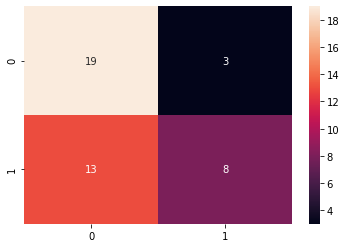

In [110]:
# Gaussian Naive Bayes
gaussian = GaussianNB()

# Train the model using the training sets and check score
gaussian.fit(X_train, y_train)

#Predict Output
gauss_predicted = gaussian.predict(X_test)

gauss_score = round(gaussian.score(X_train, y_train) * 100, 2)
gauss_score_test = round(gaussian.score(X_test, y_test) * 100, 2)
#print('\nGaussian Traning Score: \n', gauss_score)
#print('\nGaussian Test Score: \n', gauss_score_test)
print('\nNaive Bayes Accuracy: \n', accuracy_score(y_test, gauss_predicted))
print('\nConfusion Matrix: \n', confusion_matrix(y_test,gauss_predicted))
print('\nClassification Report: \n', classification_report(y_test,gauss_predicted))
sns.heatmap(confusion_matrix(y_test,gauss_predicted),annot=True,fmt="d")

In [111]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test,gauss_predicted)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test,gauss_predicted)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test,gauss_predicted)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test,gauss_predicted)
print('F1 score: %f' % f1)
MCC = matthews_corrcoef(y_test,gauss_predicted)
print('MCC: %f' % f1)

Accuracy: 0.627907
Precision: 0.727273
Recall: 0.380952
F1 score: 0.500000
MCC: 0.500000


# Random Forest


Accuracy: 
 0.6511627906976745

Confusion Matrix: 
 [[17  5]
 [10 11]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.63      0.77      0.69        22
           1       0.69      0.52      0.59        21

    accuracy                           0.65        43
   macro avg       0.66      0.65      0.64        43
weighted avg       0.66      0.65      0.65        43



<AxesSubplot:>

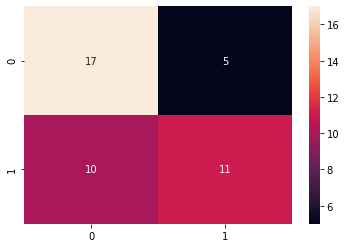

In [112]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
# Train the model using the training sets and check score
random_forest.fit(X_train, y_train)
#Predict Output
rf_predicted = random_forest.predict(X_test)

random_forest_score = round(random_forest.score(X_train, y_train) * 100, 2)
random_forest_score_test = round(random_forest.score(X_test, y_test) * 100, 2)
#print('Random Forest Traning Score: \n', random_forest_score)
#print('\nRandom Forest Test Score: \n', random_forest_score_test)
print('\nAccuracy: \n', accuracy_score(y_test,rf_predicted))
print('\nConfusion Matrix: \n', confusion_matrix(y_test,rf_predicted))
print('\nClassification Report: \n', classification_report(y_test,rf_predicted))
sns.heatmap(confusion_matrix(y_test,rf_predicted),annot=True,fmt="d")

In [113]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test,rf_predicted)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test,rf_predicted)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test,rf_predicted)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test,rf_predicted)
print('F1 score: %f' % f1)
MCC = matthews_corrcoef(y_test,rf_predicted)
print('MCC: %f' % f1)

Accuracy: 0.651163
Precision: 0.687500
Recall: 0.523810
F1 score: 0.594595
MCC: 0.594595


# Random Forest KFold CV

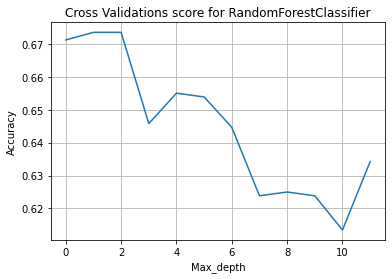

In [120]:
# Random Forest 
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

hist1 = []
for i in range(1,13):
    clf = RandomForestClassifier(n_estimators=80, max_depth=i, random_state=0)
    cross_val = cross_val_score(clf, X_train, y_train, cv=12)
    hist1.append(np.mean(cross_val))
plt.plot(hist1)
plt.title('Cross Validations score for RandomForestClassifier')
plt.xlabel('Max_depth')
plt.ylabel('Accuracy')
plt.grid()

In [121]:
print(hist1)

[0.6712962962962963, 0.673611111111111, 0.673611111111111, 0.6458333333333334, 0.6550925925925926, 0.6539351851851852, 0.6446759259259259, 0.6238425925925926, 0.625, 0.6238425925925926, 0.6134259259259259, 0.6342592592592592]


In [122]:
np.average(hist1)

0.6448688271604939

# Model evaluation

In [40]:
#We can now rank our evaluation of all the models to choose the best one for our problem. 
models = pd.DataFrame({
    'Model': ['Knn','Logistic Regression', 'Gaussian Naive Bayes','Random Forest', 'Decision Tree'],
    'Accuracy': [ accuracy_score(y_test,K_predicted), accuracy_score(y_test,log_predicted), accuracy_score(y_test,gauss_predicted), accuracy_score(y_test,rf_predicted),accuracy_score(y_test,dt_predicted)],
    'Test Score': [ Knn_score_test,logreg_score_test, gauss_score_test, random_forest_score_test,dtree_score_test]})
models.sort_values(by='Test Score', ascending=False)


,Model,Accuracy,Test Score
2,Gaussian Naive Bayes,0.697674,69.77
0,Knn,0.651163,65.12
3,Random Forest,0.651163,65.12
1,Logistic Regression,0.627907,62.79
4,Decision Tree,0.581395,58.14


In [41]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

In [42]:
h = ('Logistic Regression', 'Navie Bayes', 'Random Forest', 'Decision Tree')   
g = [logreg_score_test,gauss_score_test,random_forest_score_test,dtree_score_test]    
y_pos = np.arange(len(h))

<function matplotlib.pyplot.show(close=None, block=None)>

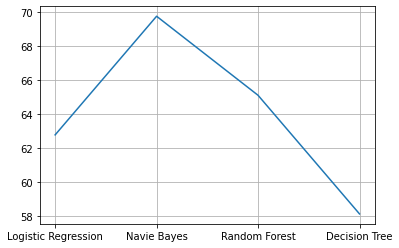

In [43]:
plt.plot(y_pos,g)
plt.xticks(y_pos,h)
plt.grid()
plt.show


In [83]:
#h = ('Logistic Regression', 'Navie Bayes', 'Random Forest', 'Decision Tree')
#y_pos = np.arange(len(h))
#plt.xticks(y_pos, h)
#plt.show